In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.signal import medfilt

In [2]:
losses = []
i = 0
with open("sand2.csv","r") as f:
    for i, row in enumerate(f):
        try:
            #print(row)
            lossD = float(row.split(" ")[2])
            lossG = float(row.split(" ")[4])
            errD = float(row.split(" ")[6])
            errG = float(row.split(" ")[8])
            losses.append((lossD, lossG, errD, errG))
        except IndexError:
            pass

losses1 = np.array(losses)
print(losses1.shape)
print(losses1)

(686000, 4)
[[1.3009e+00 6.2990e-01 6.2460e-01 4.9600e-01]
 [1.9395e+00 8.3240e-01 5.0720e-01 5.9330e-01]
 [1.7146e+00 8.2260e-01 6.5300e-01 6.4990e-01]
 ...
 [3.4150e-01 5.6559e+00 9.1170e-01 4.0000e-03]
 [3.5540e-01 5.7296e+00 9.3230e-01 3.8000e-03]
 [3.3430e-01 5.7513e+00 9.1070e-01 3.5000e-03]]


In [3]:
losses = []
i = 0
with open("soil2.csv","r") as f:
    for i, row in enumerate(f):
        try:
            #print(row)
            lossd = float(row.split(" ")[2])
            lossg = float(row.split(" ")[4])
            errd = float(row.split(" ")[6])
            errg = float(row.split(" ")[8])
            losses.append((lossd, lossg, errd, errg))
        except IndexError:
            pass

losses2 = np.array(losses)
print(losses2.shape)
print(losses2)

(1715000, 4)
[[1.4516 0.6234 0.4937 0.496 ]
 [1.5625 0.8304 0.6471 0.5969]
 [1.6823 0.8233 0.6849 0.6507]
 ...
 [0.4995 3.0771 0.8182 0.047 ]
 [0.4591 3.068  0.8546 0.0486]
 [0.4247 3.1255 0.8568 0.0497]]


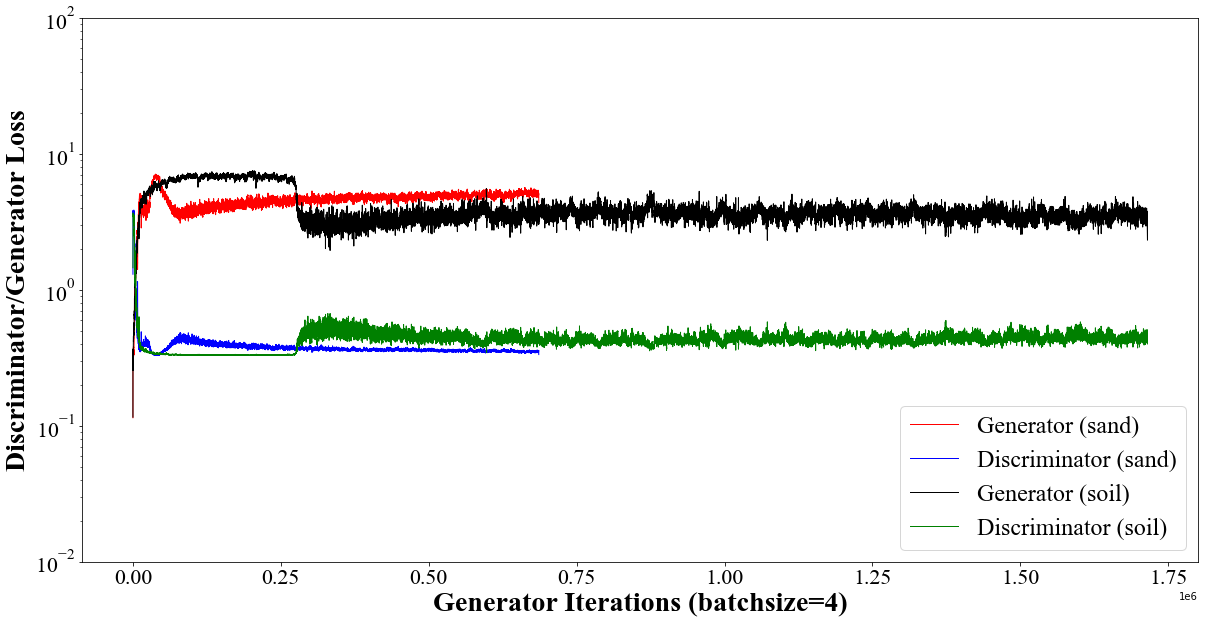

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
n = 101
w = 3
labelsize = 24
ticksize = 22
legendsize = 22
fontdict='Times New Roman'
font1= {'family':'Times New Roman'
         ,'style':'normal'
        ,'weight':'bold' #'normal'
#         ,'color':'red'
       ,'size':28
       }
font2={'family':'Times New Roman'
         ,'style':'normal'
        ,'weight':'normal'
#         ,'color':'red'
       ,'size':24
       }

ax.semilogy(range(losses1.shape[0]),  medfilt(losses1[:, 1], n), color="r", linestyle="-", linewidth=1, label="Generator (sand)")
ax.semilogy(range(losses1.shape[0]),  medfilt(losses1[:, 0], n), color="b", linestyle="-", linewidth=1, label="Discriminator (sand)")
ax.semilogy(range(losses2.shape[0]),  medfilt(losses2[:, 1], n), color="k", linestyle="-", linewidth=1, label="Generator (soil)")
ax.semilogy(range(losses2.shape[0]),  medfilt(losses2[:, 0], n), color="g", linestyle="-", linewidth=1, label="Discriminator (soil)")


#ax.axvline(7508, linestyle="--", linewidth=2, color="black")
#ax.axvline(7508+7*167, linestyle="--", linewidth=2, color="black")
plt.xlabel("Generator Iterations (batchsize=4)", fontdict=font1)
plt.ylabel("Discriminator/Generator Loss", fontdict=font1)
ax.set_ylim(1e-2, 1e2)
for item in ax.get_xticklabels():
    item.set_fontproperties(fontdict)
    item.set_fontsize(ticksize)
for item in ax.get_yticklabels():
    item.set_fontproperties(fontdict)
    item.set_fontsize(ticksize)
ax.legend(fontsize=legendsize, loc=4, prop=font2)
fig.savefig("../../figures/training_curve2.png", bbox_extra_artists=None, bbox_inches='tight', dpi=500)